In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st
from scipy import cluster
from scipy import linalg as la
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
import pylab
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Pavilion\Downloads\abalone.data.csv')
df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight', 'Shell Weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14


In [4]:
df['Age'] = np.nan
for i in range(len(df.index)):
     df.iat[i,9] = df.iat[i,8]+1.5
df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,9.5
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,21.5
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,17.5
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,10.5
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,20.5
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14,15.5


In [9]:
df_length = df['Length']
df_diameter = df['Diameter']
df_height = df['Height']
df_wweight = df['Whole Weight']
df_sweight = df['Shucked Weight']
df_vweight = df['Viscera Weight']
df_shweight = df['Shell Weight']
df_ring = df['Rings']

0.969402734545 0.0


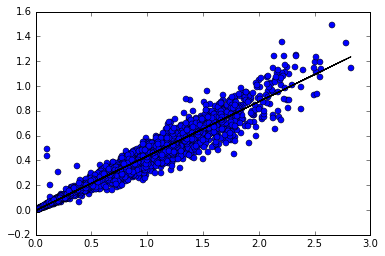

In [12]:
slope, intercept, r_value, p_value, slope_std_error = st.linregress(df_wweight, df_sweight)
predict_y = intercept + slope * df_wweight
pred_error = df_sweight - predict_y
degrees_of_freedom = len(df_wweight) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
print(r_value, p_value)
pylab.plot(df_wweight, df_sweight, 'o')
pylab.plot(df_wweight, predict_y, 'k-')
pylab.show()

0.966372147113 0.0


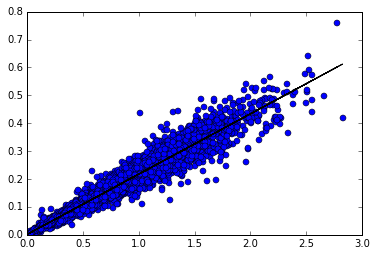

In [13]:
slope, intercept, r_value, p_value, slope_std_error = st.linregress(df_wweight, df_vweight)
predict_y = intercept + slope * df_wweight
pred_error = df_vweight - predict_y
degrees_of_freedom = len(df_wweight) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
print(r_value, p_value)
pylab.plot(df_wweight, df_vweight, 'o')
pylab.plot(df_wweight, predict_y, 'k-')
pylab.show()

0.955351063616 0.0


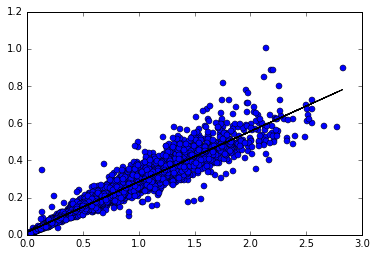

In [14]:
slope, intercept, r_value, p_value, slope_std_error = st.linregress(df_wweight, df_shweight)
predict_y = intercept + slope * df_wweight
pred_error = df_shweight - predict_y
degrees_of_freedom = len(df_wweight) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
print(r_value, p_value)
pylab.plot(df_wweight, df_shweight, 'o')
pylab.plot(df_wweight, predict_y, 'k-')
pylab.show()